<a href="https://colab.research.google.com/github/lakshmi-4/Basic-ML/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
data='Coconut_disease_dataset'
classes = os.listdir(data)
print(classes)

['Bud Root Dropping', 'Bud Rot', 'Caterpillars', 'Flaccidity', 'Stem Bleeding', 'Yellowing']


In [ ]:
for class_name in os.listdir(data):
    class_path = os.path.join(data, class_name)
    print(class_path)

Coconut_disease_dataset\Bud Root Dropping
Coconut_disease_dataset\Bud Rot
Coconut_disease_dataset\Caterpillars
Coconut_disease_dataset\Flaccidity
Coconut_disease_dataset\Stem Bleeding
Coconut_disease_dataset\Yellowing


In [ ]:
# Directories (class names) found in the dataset
class_directories = []

# Total number of images
total_images = 0

# Iterate through class folders
for class_name in os.listdir(data):
    class_path = os.path.join(data,class_name)

    # Check if the path is a directory
    if os.path.isdir(class_path):
        class_directories.append(class_name)

        # Count the number of images in each class
        class_images = len(os.listdir(class_path))
        total_images += class_images

        # Display the number of images for each class
        print(f"{class_name}: {class_images} images")

# Display the total number of disease names and total number of images
print("\nTotal Number of Disease Names:", len(class_directories))
print("Total Number of Images:", total_images)

Bud Root Dropping: 518 images
Bud Rot: 473 images
Caterpillars: 997 images
Flaccidity: 1079 images
Stem Bleeding: 1009 images
Yellowing: 1084 images

Total Number of Disease Names: 6
Total Number of Images: 5160


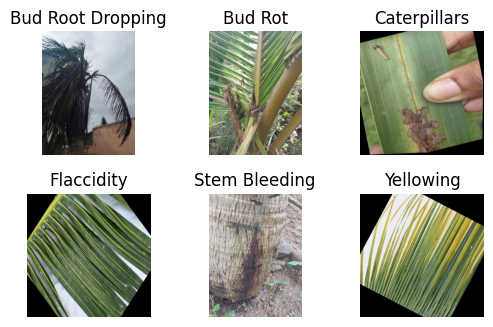

In [ ]:
from PIL import Image
from matplotlib.image import imread
import random
import os
# Assuming you have a variable class_directories containing your class names
class_directories = ['Bud Root Dropping', 'Bud Rot', 'Caterpillars', 'Flaccidity', 'Stem Bleeding', 'Yellowing']

# Plot one image from each class
plt.figure(figsize=(5,5))

for i, class_name in enumerate(class_directories, start=1):
    plt.subplot(3, 3, i)
    plt.tight_layout()

    # Get the path to the class directory
    class_path = os.path.join(data, class_name)

    # Use os.path.join to create the full image path
    rand_img_path = os.path.join(class_path, random.choice(os.listdir(class_path)))

    rand_img = imread(rand_img_path)
    plt.imshow(rand_img)
    plt.title(class_name)
    plt.axis('off')

plt.show()


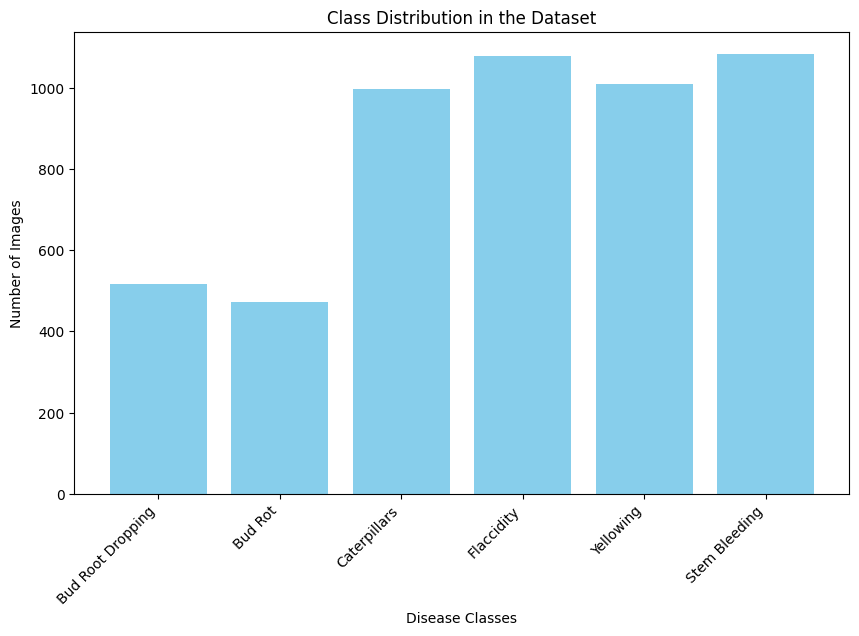

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a variable class_directories containing your class names
class_directories = ['Bud Root Dropping', 'Bud Rot', 'Caterpillars','Flaccidity', 'Yellowing', 'Stem Bleeding']

# Assuming you have a variable class_images containing the number of images for each class
class_images = [518, 473, 997, 1079, 1009, 1084]

# Plotting class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_directories, class_images, color='skyblue')
plt.title('Class Distribution in the Dataset')
plt.xlabel('Disease Classes')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
import os
import shutil
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
data_dir = 'Coconut_disease_dataset'
saved_data_dir = 'saved'

train_dir = os.path.join(saved_data_dir, 'train')
validation_dir = os.path.join(saved_data_dir, 'validation')
test_dir = os.path.join(saved_data_dir, 'test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

for class_name in ['Bud Root Dropping', 'Bud Rot', 'Caterpillars','Flaccidity', 'Yellowing', 'Stem Bleeding']:

    class_dir = os.path.join(data_dir, class_name)

    files = os.listdir(class_dir)

    random.shuffle(files)

    train_split_idx = int(train_ratio * len(files))
    validation_split_idx = int((train_ratio + validation_ratio) * len(files))

    train_files = files[:train_split_idx]
    validation_files = files[train_split_idx:validation_split_idx]
    test_files = files[validation_split_idx:]

    for filename in train_files:
        src_path = os.path.join(class_dir, filename)
        dst_path = os.path.join(train_dir, class_name, filename)
        os.makedirs(os.path.dirname(dst_path), exist_ok=True)
        shutil.copy(src_path, dst_path)

    for filename in validation_files:
        src_path = os.path.join(class_dir, filename)
        dst_path = os.path.join(validation_dir, class_name, filename)
        os.makedirs(os.path.dirname(dst_path), exist_ok=True)
        shutil.copy(src_path, dst_path)

    for filename in test_files:
        src_path = os.path.join(class_dir, filename)
        dst_path = os.path.join(test_dir, class_name, filename)
        os.makedirs(os.path.dirname(dst_path), exist_ok=True)
        shutil.copy(src_path, dst_path)

**importing data :**

In [ ]:
# Define the paths to the datasets
train_dir = 'saved/train'
validation_dir = 'saved/validation'
test_dir = 'saved/test'

# Define the input image dimensions
img_height = 224
img_width = 224

# Define the number of classes
num_classes = 6

**Instantiate data generators for training, validation, and test sets :**

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=28,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical')

Found 3608 images belonging to 6 classes.
Found 775 images belonging to 6 classes.
Found 776 images belonging to 6 classes.


**Define the model architecture :**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

**Compile the model :**

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Train the model :**

In [ ]:
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10


129/129 [==============================] - 377s 3s/step - loss: 0.8248 - accuracy: 0.6605 - val_loss: 0.2911 - val_accuracy: 0.8800
Epoch 2/10
129/129 [==============================] - 346s 3s/step - loss: 0.3165 - accuracy: 0.8941 - val_loss: 0.1210 - val_accuracy: 0.9613
Epoch 3/10
129/129 [==============================] - 347s 3s/step - loss: 0.2147 - accuracy: 0.9340 - val_loss: 0.1887 - val_accuracy: 0.9226
Epoch 4/10
129/129 [==============================] - 335s 3s/step - loss: 0.1326 - accuracy: 0.9570 - val_loss: 0.0790 - val_accuracy: 0.9690
Epoch 5/10
129/129 [==============================] - 328s 3s/step - loss: 0.1310 - accuracy: 0.9584 - val_loss: 0.1068 - val_accuracy: 0.9600
Epoch 6/10
129/129 [==============================] - 342s 3s/step - loss: 0.1315 - accuracy: 0.9570 - val_loss: 0.1617 - val_accuracy: 0.9406
Epoch 7/10
129/129 [==============================] - 345s 3s/step - loss: 0.0805 - accuracy: 0.9770 - val_loss: 0.0291 - val_accuracy: 0.98

**Evaluate the model on the test set :**

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

25/25 [==============================] - 27s 1s/step - loss: 0.0683 - accuracy: 0.9729
Test accuracy: 0.9729381203651428


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model


In [ ]:
img_height = 224
img_width = 224

# Load the model
img_path =r'C:\\Users\Admin\Documents\project\Scripts\Dataset\saved\test\Stem Bleeding\SB1  (834).jpg'
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Rescale pixel values to [0, 1]
class_labels= ['Bud Root Dropping', 'Bud Rot', 'Caterpillars','Flaccidity', 'Stem Bleeding','Yellowing']

# Make prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]


# Print the result
print('Predicted Disease:', predicted_class_label)

1/1 [==============================] - 0s 63ms/step
Predicted Disease: Stem Bleeding


In [ ]:
model.save('project.h5')